In [ ]:
# Just some other linkz on making your own embeddings:
# https://arxiv.org/pdf/1301.3781.pdf - word2vec
# https://nlp.stanford.edu/projects/glove/ - GloVe
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6371367/
# https://blog.cambridgespark.com/tutorial-build-your-own-embedding-and-use-it-in-a-neural-network-e9cde4a81296

In [2]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [3]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [4]:
# access vector for one word
print(model['sentence'])

[-1.8352198e-03  2.9500478e-03 -1.4659271e-03  3.2677061e-03
 -1.8424453e-04  2.7130456e-03 -1.0424436e-03 -1.1343373e-03
 -2.1280432e-03 -1.6823710e-03 -3.4055641e-04  1.9433233e-03
 -4.5209524e-04  2.9160033e-03  3.5027915e-03  3.6051213e-03
 -4.4455929e-03 -9.9193328e-04 -2.3304888e-03 -3.2337802e-03
 -3.3171549e-03  2.9105765e-03  1.9978610e-04 -4.5817150e-03
  1.9881413e-03 -3.0491638e-03  7.6172076e-04 -4.2998106e-03
  4.4081896e-03 -4.0952871e-03 -1.6336864e-03  3.5365361e-03
 -3.9681606e-03  4.2158784e-03  1.1624377e-03 -9.7975868e-04
  3.8677561e-03  7.8446692e-04  4.7387904e-03 -2.0086679e-03
  2.4085974e-03 -4.8610801e-03 -3.1045510e-03  4.8881886e-03
 -4.0958035e-03 -2.2087591e-03  2.2282207e-03 -2.6072063e-03
 -4.0496443e-03 -1.7069414e-03  1.5982088e-03  4.7378126e-03
  2.5791666e-03  5.8734172e-04 -1.2278074e-03  2.7041093e-03
 -4.8144645e-04  8.3932182e-06 -2.0523323e-03  4.7780075e-03
 -4.4443831e-03  1.0589075e-03  4.3675234e-03  3.1073615e-03
 -1.3269521e-03 -4.22967

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [5]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [6]:
# get all embeddings for all words
X = model[model.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


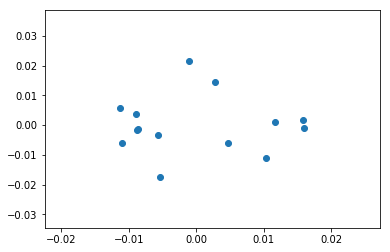

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to visualize in two dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])

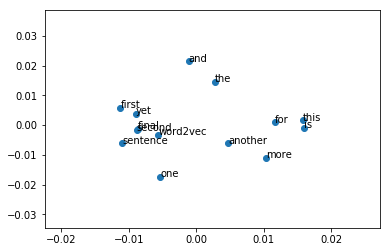

In [13]:
# Same graph, but with thew points annoted with the words
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Load Google’s Word2Vec Embedding 
The word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

In [ ]:
# Download GoogleNews-vectors-negative300.bin.gz
# - https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [15]:
# The Gensim library provides tools to load this file. 
# Specifically, you can call the KeyedVectors.load_word2vec_format() function to 
# load this model into memory, for example:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)  # can take about 1 minute to load
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

## Load Stanford’s GloVe Embedding
Stanford researchers also have their own word embedding algorithm like word2vec called Global Vectors for Word Representation, or GloVe for short.

I won’t get into the details of the differences between word2vec and GloVe here, but generally, NLP practitioners seem to prefer GloVe at the moment based on results.

In [ ]:
# Download glove.6B.zip
# - http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)